# Loading Library

In [1]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [2]:
from IPython import display
from roboflow import Roboflow
from ultralytics import YOLO

display.clear_output()
from IPython.display import display, Image

# Loading Data

### https://universe.roboflow.com/for-the-fish/classification-of-common-freshwater-pet-store-fish-3dvvi

In [3]:
rf = Roboflow(api_key="A0JN8vO130atlzhwM2JN")
project = rf.workspace("for-the-fish").project("classification-of-common-freshwater-pet-store-fish-3dvvi")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Classification-of-Common-Freshwater-Pet-Store-Fish-4 in yolov8:: 100%|██████████| 1966/1966 [00:00<00:00, 2559.70it/s]


# Train The Model

In [4]:
model = YOLO('yolov8n.pt')

# Train the model
model.train(data='/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml', epochs=50, batch=16)

100%|██████████| 6.25M/6.25M [00:00<00:00, 253MB/s]


Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 84.7MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/train/labels... 837 images, 0 backgrounds, 0 corrupt: 100%|██████████| 837/837 [00:00<00:00, 1445.08it/s]

train: New cache created: /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/valid/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 1207.78it/s]

val: New cache created: /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.35G     0.7032      3.165      1.218         11        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


                   all         70         71      0.838      0.109       0.49      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.22G     0.6851      2.074        1.2         13        640: 100%|██████████| 53/53 [00:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         70         71      0.689      0.794      0.858      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G     0.6812      1.668      1.188         18        640: 100%|██████████| 53/53 [00:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all         70         71      0.784      0.815      0.866      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G      0.699      1.541      1.173         11        640: 100%|██████████| 53/53 [00:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         70         71      0.737      0.734      0.815      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.22G     0.6747       1.43      1.155         15        640: 100%|██████████| 53/53 [00:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         70         71      0.696      0.679      0.782      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G     0.6328      1.253      1.115         15        640: 100%|██████████| 53/53 [00:18<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         70         71      0.819      0.844      0.935      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G     0.6307      1.213       1.13         12        640: 100%|██████████| 53/53 [00:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         70         71      0.793      0.835      0.899      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.22G      0.619      1.138      1.119         13        640: 100%|██████████| 53/53 [00:18<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         70         71       0.92      0.874       0.96      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G     0.6116      1.099      1.111         17        640: 100%|██████████| 53/53 [00:23<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         70         71      0.934      0.975      0.972      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G     0.5885      1.034        1.1         13        640: 100%|██████████| 53/53 [00:18<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         70         71      0.961      0.925      0.989      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G     0.5513     0.9248      1.071         14        640: 100%|██████████| 53/53 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         70         71        0.9      0.962      0.975       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G      0.548     0.8931      1.056         13        640: 100%|██████████| 53/53 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         70         71      0.976      0.964      0.984      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.21G     0.5467     0.8544       1.06         13        640: 100%|██████████| 53/53 [00:16<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         70         71      0.882      0.975      0.967      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.21G     0.5412     0.8164      1.062         11        640: 100%|██████████| 53/53 [00:17<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         70         71      0.951      0.945      0.985      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G     0.5124     0.8113      1.049         12        640: 100%|██████████| 53/53 [00:16<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         70         71      0.972      0.954      0.982      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.24G     0.5127     0.7609      1.049         16        640: 100%|██████████| 53/53 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         70         71      0.974      0.949      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.22G     0.5009     0.7438      1.038         16        640: 100%|██████████| 53/53 [00:16<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         70         71      0.971      0.963      0.988      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G     0.4994     0.7362       1.05         14        640: 100%|██████████| 53/53 [00:16<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         70         71      0.907      0.937      0.976      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.22G     0.4763      0.672      1.025         14        640: 100%|██████████| 53/53 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         70         71      0.984      0.983      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.22G     0.4728     0.6495      1.024         15        640: 100%|██████████| 53/53 [00:19<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         70         71      0.962      0.959      0.991      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.22G     0.4707      0.634      1.017         13        640: 100%|██████████| 53/53 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         70         71      0.937      0.978      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.23G     0.4864     0.6667      1.033          9        640: 100%|██████████| 53/53 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         70         71      0.967       0.97      0.988      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.22G     0.4524     0.6288      1.012         14        640: 100%|██████████| 53/53 [00:16<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         70         71      0.967      0.977      0.992      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G     0.4504     0.6352      0.999          9        640: 100%|██████████| 53/53 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         70         71      0.955      0.947       0.99      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.22G     0.4266     0.5725     0.9932         11        640: 100%|██████████| 53/53 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         70         71      0.972       0.97       0.99      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.21G     0.4256     0.5527     0.9943         13        640: 100%|██████████| 53/53 [00:16<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         70         71      0.987      0.969      0.994      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.22G     0.4218     0.5529     0.9917          8        640: 100%|██████████| 53/53 [00:17<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         70         71      0.986      0.974      0.994      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G     0.4095     0.5378     0.9896         15        640: 100%|██████████| 53/53 [00:16<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         70         71      0.978      0.929      0.973      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.22G      0.409     0.5179     0.9842         18        640: 100%|██████████| 53/53 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         70         71      0.965      0.994      0.992      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G     0.4152     0.5256     0.9864         15        640: 100%|██████████| 53/53 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         70         71      0.962      0.973      0.992      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.22G     0.4158     0.5112     0.9798         12        640: 100%|██████████| 53/53 [00:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         70         71      0.977      0.959      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.22G     0.3951      0.497     0.9696         12        640: 100%|██████████| 53/53 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         70         71      0.974      0.977      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G     0.4024     0.5113     0.9813         14        640: 100%|██████████| 53/53 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         70         71      0.974      0.986      0.981      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.2G       0.38      0.475     0.9626         11        640: 100%|██████████| 53/53 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         70         71      0.974      0.999      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G     0.3852     0.4517     0.9735         14        640: 100%|██████████| 53/53 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         70         71      0.989      0.995      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.22G      0.381     0.4735     0.9718         11        640: 100%|██████████| 53/53 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         70         71      0.974      0.978      0.981      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.21G     0.3758     0.4403     0.9552         10        640: 100%|██████████| 53/53 [00:16<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         70         71      0.964      0.967      0.986      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.2G     0.3751     0.4642     0.9654         11        640: 100%|██████████| 53/53 [00:16<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         70         71      0.991       0.99      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.24G     0.3661     0.4467     0.9584         14        640: 100%|██████████| 53/53 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         70         71       0.99      0.982      0.987      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G     0.3589     0.4343      0.954          8        640: 100%|██████████| 53/53 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         70         71      0.973      0.991      0.995       0.88


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.28G     0.2901     0.3723     0.9662          5        640: 100%|██████████| 53/53 [00:21<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         70         71      0.992       0.99      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G      0.275     0.3375     0.9444          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         70         71      0.987      0.989      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.19G     0.2513     0.3013     0.9181          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         70         71      0.964      0.992      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.19G     0.2428     0.2897     0.9198          5        640: 100%|██████████| 53/53 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         70         71      0.973      0.989      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G     0.2316     0.2847     0.9182          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         70         71      0.989       0.99      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G     0.2406     0.2731     0.9202          7        640: 100%|██████████| 53/53 [00:16<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         70         71      0.992      0.992      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.19G     0.2245     0.2611     0.9036          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         70         71      0.992      0.994      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G     0.2241     0.2557     0.9108          5        640: 100%|██████████| 53/53 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         70         71      0.991       0.99      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.19G     0.2093     0.2415     0.9027          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         70         71      0.992      0.989      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G      0.206     0.2395     0.8928          5        640: 100%|██████████| 53/53 [00:15<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         70         71      0.991      0.989      0.995      0.917



50 epochs completed in 0.272 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


                   all         70         71      0.991      0.989      0.995      0.917
            Bala Shark         10         10      0.986          1      0.995      0.995
     Bristlenose Pleco         10         10      0.996          1      0.995      0.863
           Clown Loach         10         10       0.99          1      0.995      0.957
  Freshwater Angelfish         10         10      0.989          1      0.995      0.819
            Neon Tetra         10         10          1      0.921      0.995      0.924
         Silver Dollar         10         10      0.989          1      0.995      0.985
             Swordtail         10         11      0.989          1      0.995      0.875
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbba87c4f40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# Evaluation Model

In [5]:
model.val(data='/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml')

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


                   all         70         71      0.991      0.989      0.995      0.917
            Bala Shark         10         10      0.986          1      0.995      0.995
     Bristlenose Pleco         10         10      0.996          1      0.995      0.863
           Clown Loach         10         10       0.99          1      0.995      0.957
  Freshwater Angelfish         10         10      0.989          1      0.995      0.819
            Neon Tetra         10         10          1      0.921      0.995      0.924
         Silver Dollar         10         10      0.989          1      0.995      0.985
             Swordtail         10         11      0.989          1      0.995      0.875
Speed: 0.4ms preprocess, 9.7ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbba8dc6fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

[Errno 2] No such file or directory: '{HOME}'
/content


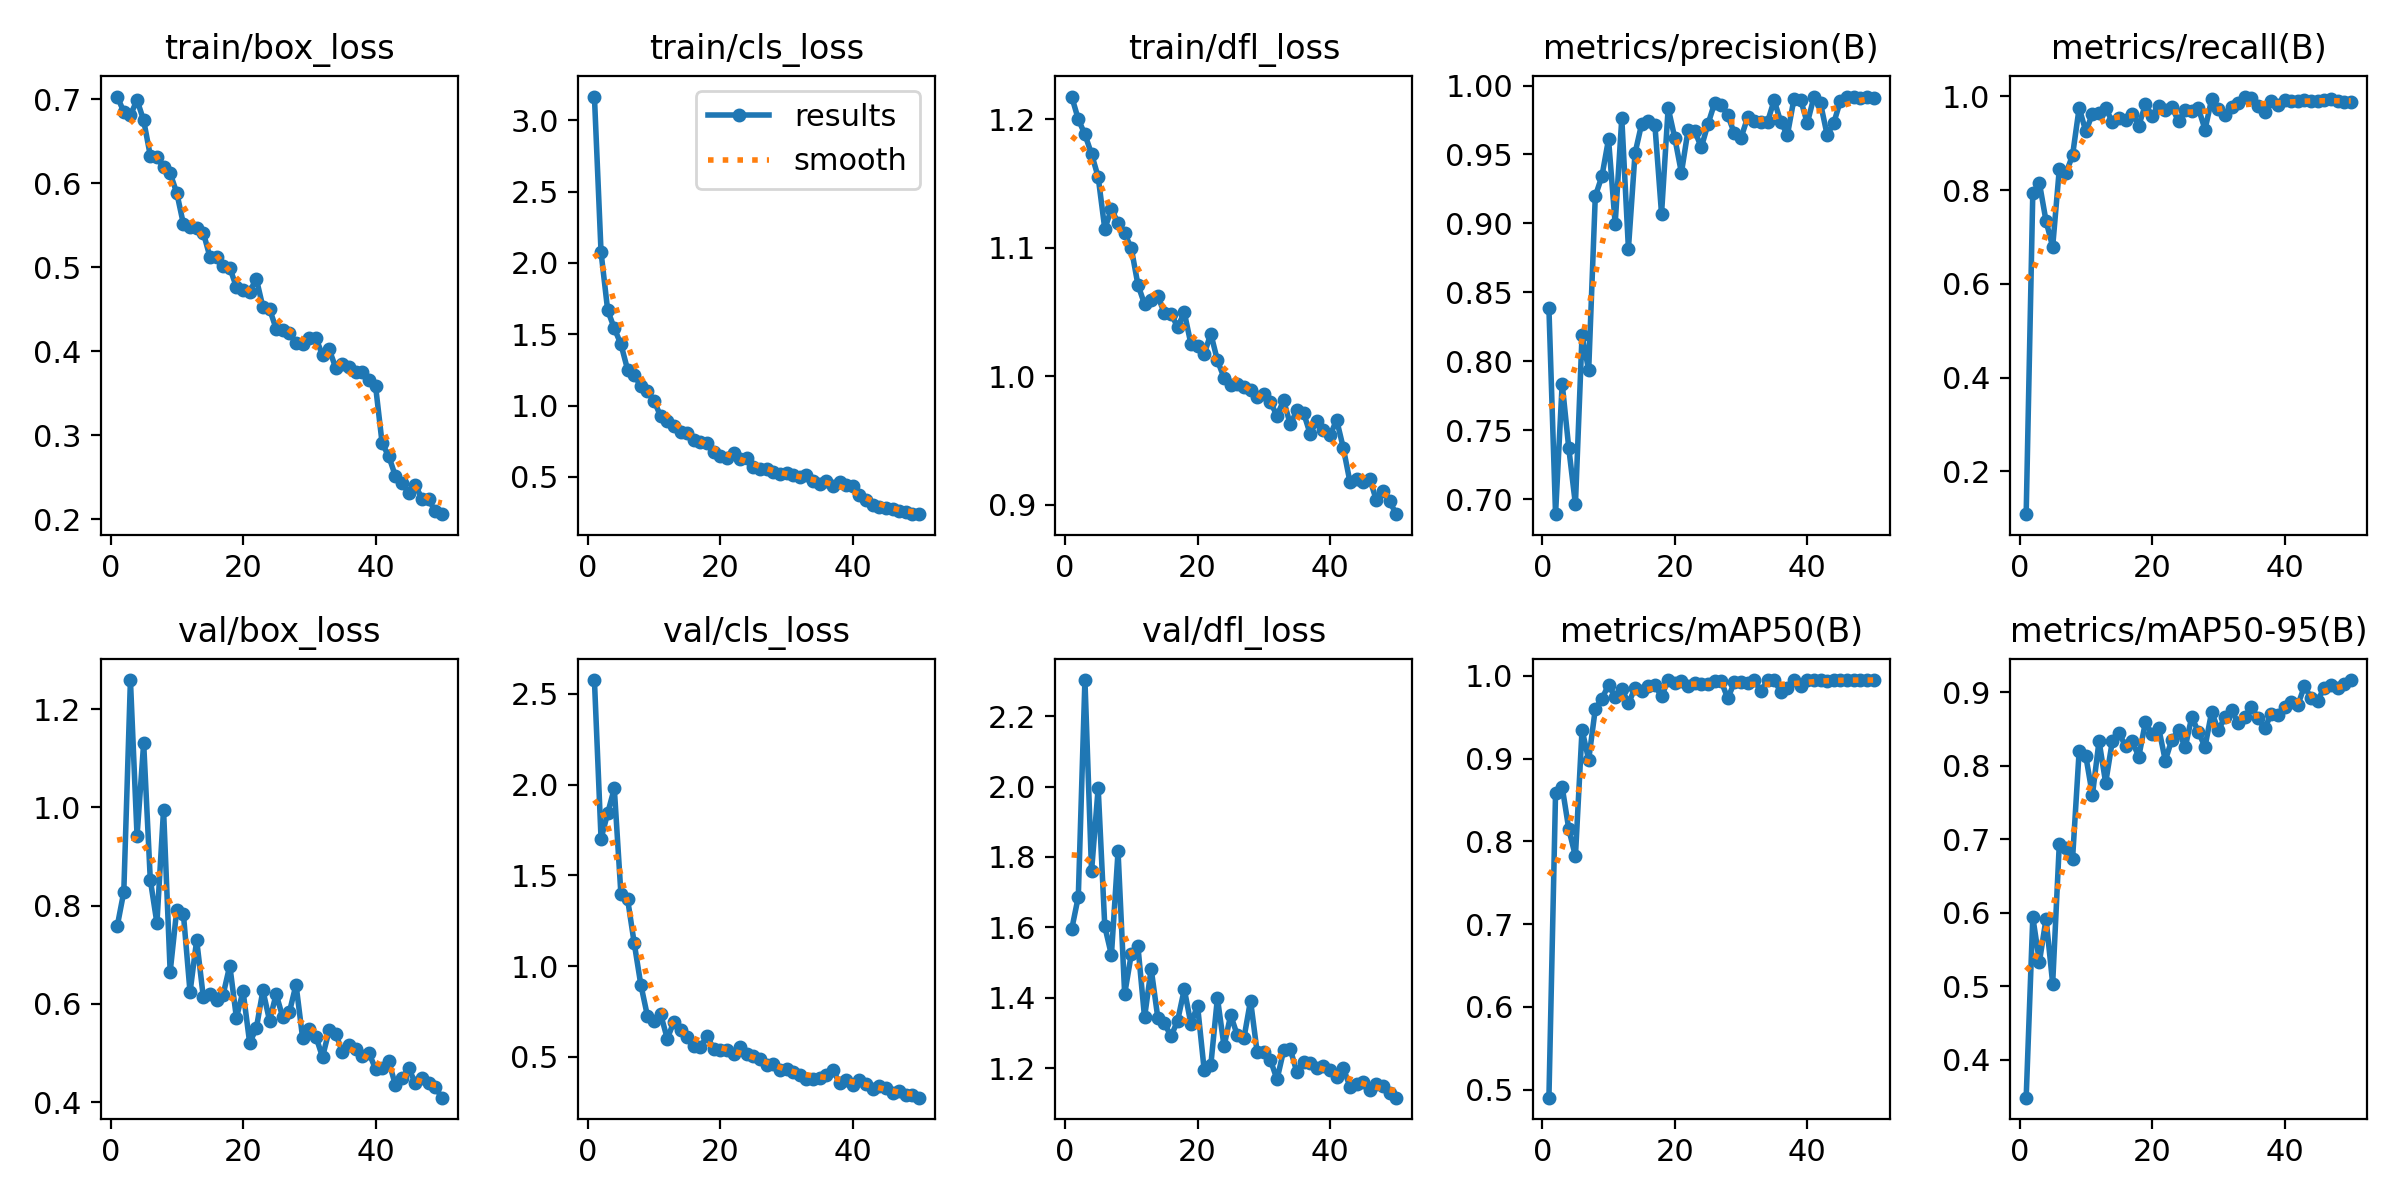

In [6]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

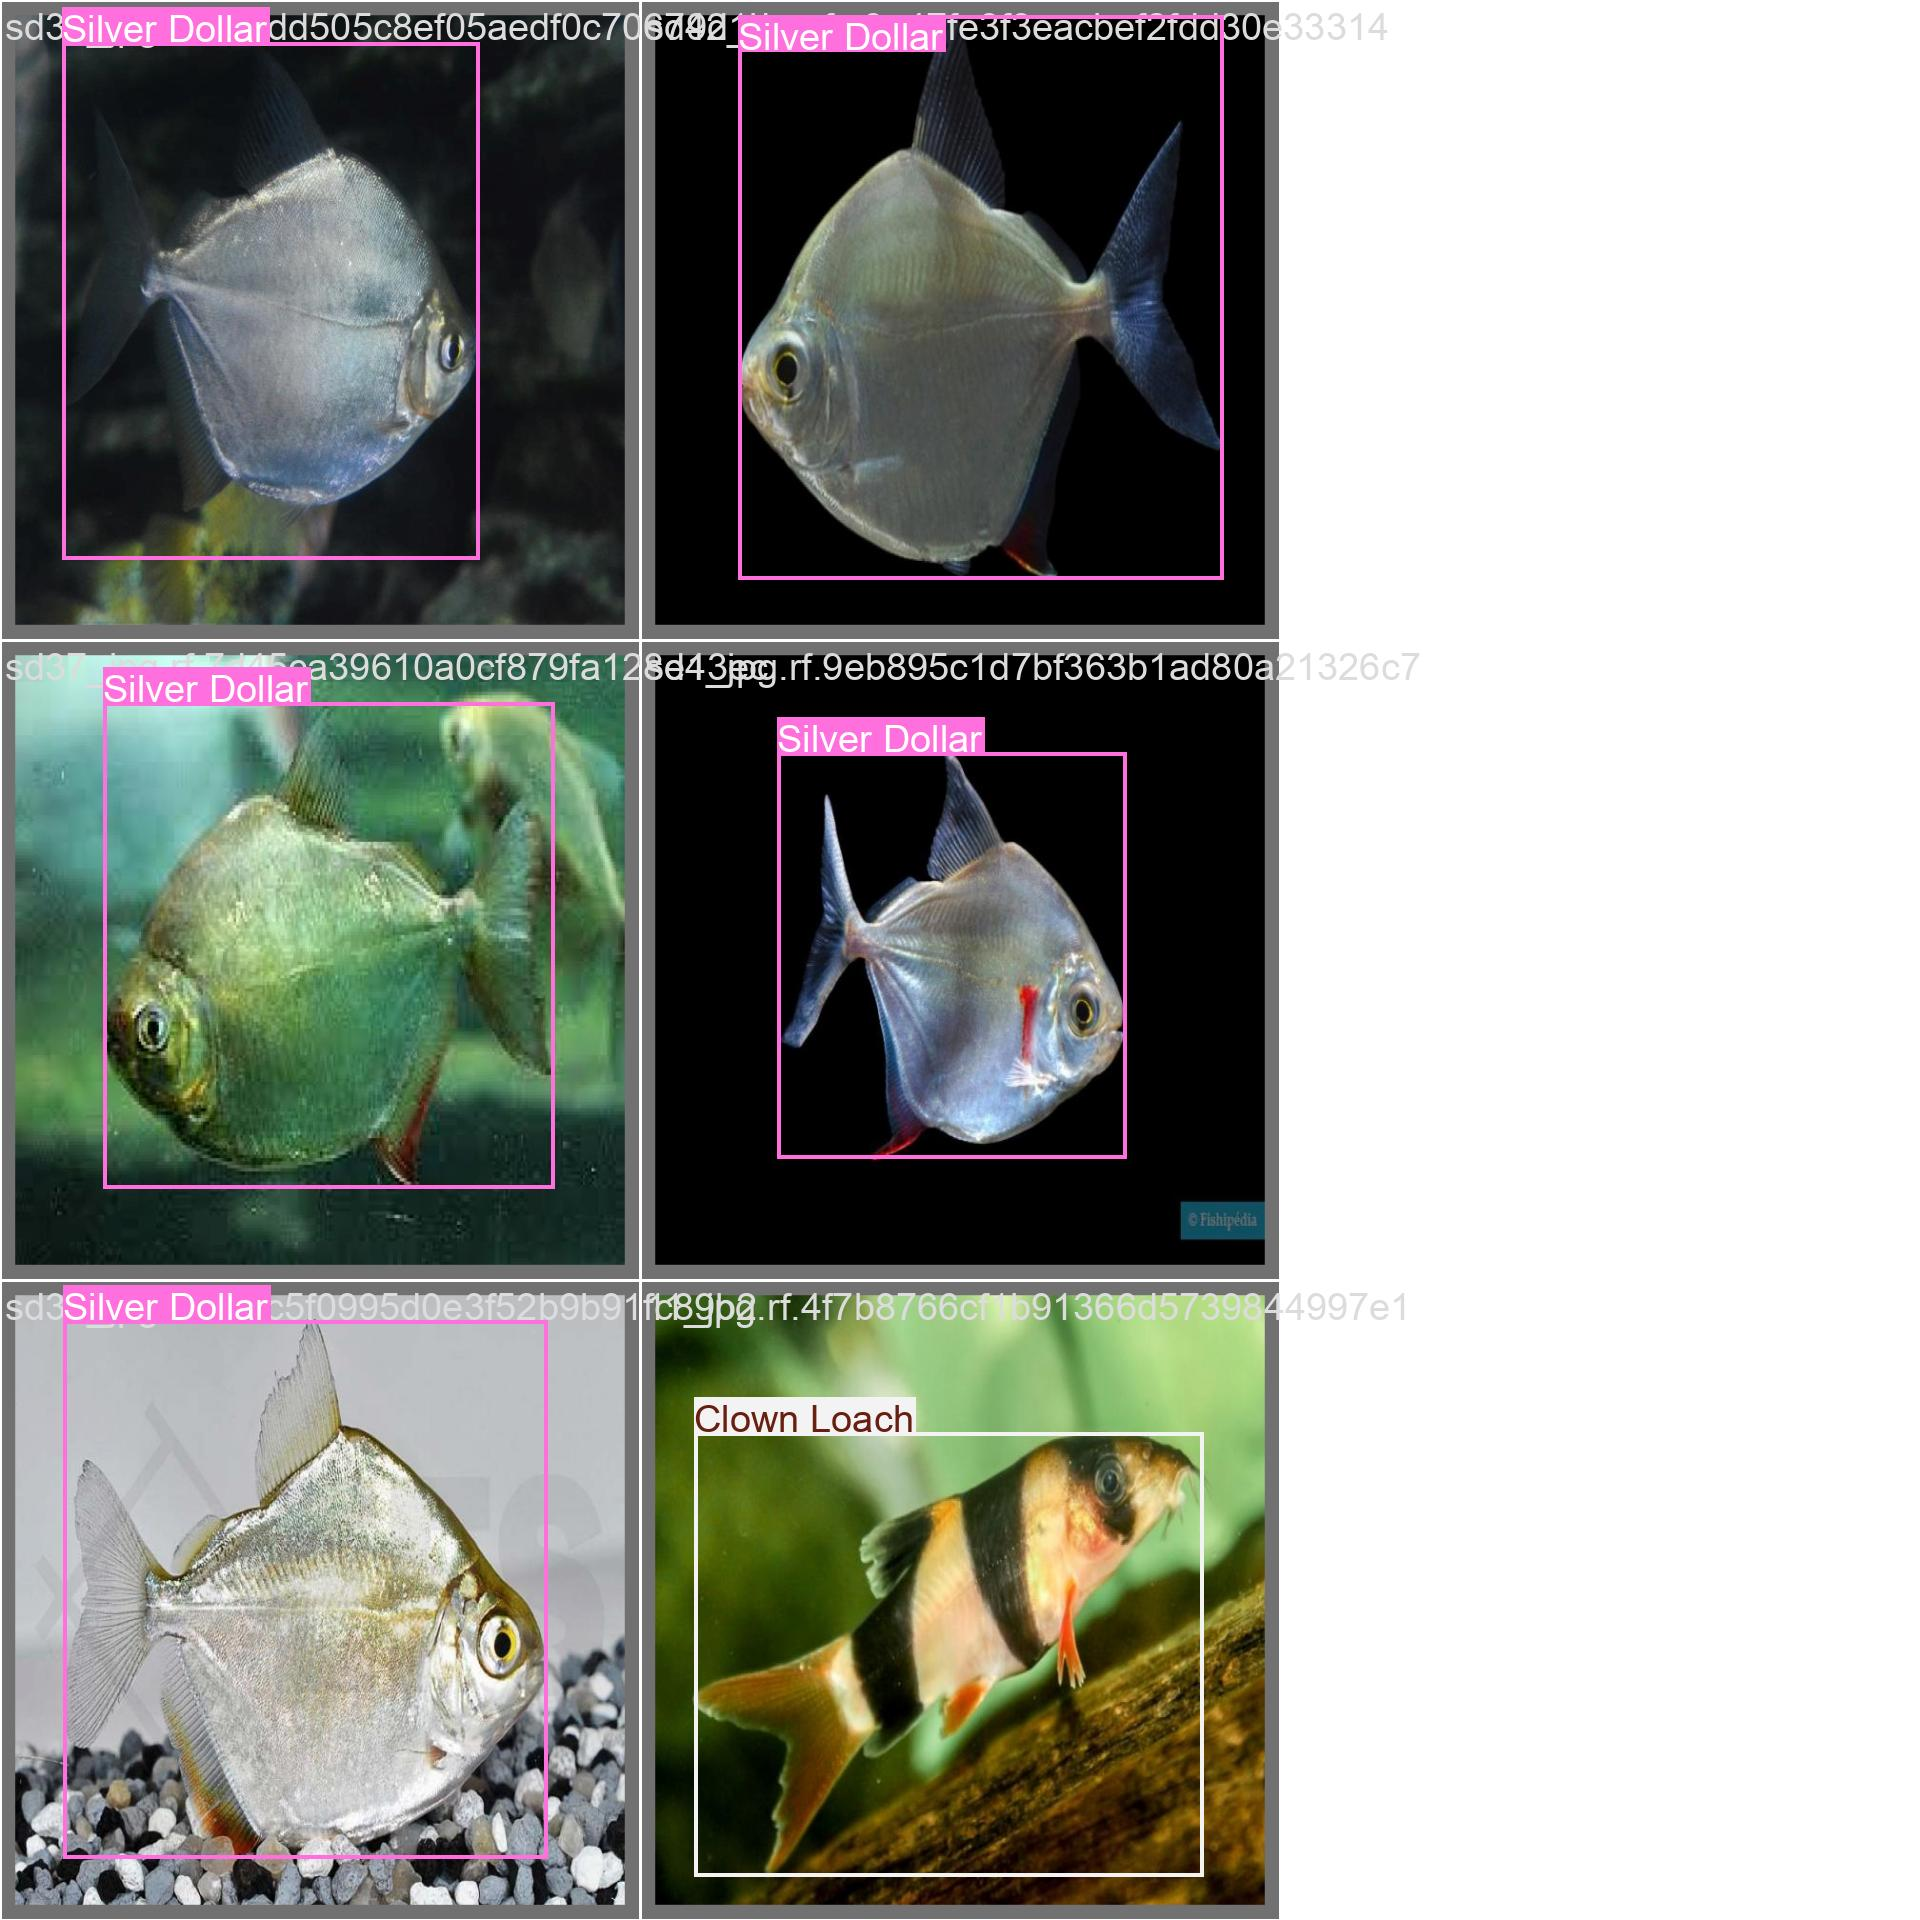

In [7]:
Image(filename=f'/content/runs/detect/train/val_batch2_labels.jpg', width=600)

# Streamlit Website

In [ ]:
# --------------- Axial MRI Detection -------------------
import numpy as np
from ultralytics import YOLO
from PIL import Image
import streamlit as st
import pandas as pd
import cv2

model = YOLO(r'C:\Users\osama\Downloads\Freshwater_Pet_Store_Fish.pt')
class_list = model.names

st.title('Freshwater Pet Store Fish. 🐟🐟')
file_uploader = st.file_uploader('Upload The Image', type=['jpg', 'png'])
if file_uploader:
    image = Image.open(file_uploader)
    image = np.array(image)
    prediction = model.predict(image)[0].boxes.data
    final_pred = pd.DataFrame(prediction).astype(float)
    for index, row in final_pred.iterrows():
        x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])
        cls = class_list[int(row[5])]
        confidence = row[4]


        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 165), 1)
        cv2.rectangle(image, (x1, y1 - 18), (x1 + 40, y1), (0, 255, 165), -1)

        cv2.putText(image, f'{cls}', (x1, y1 - 10), cv2.FONT_ITALIC, 0.3, (0, 0, 0), 1)
        cv2.putText(image, f'{round(confidence, 2)}%', (x1, y1), cv2.FONT_ITALIC, 0.3, (0, 0, 0), 1)

    st.image(image, caption='Processed Image', use_column_width=True)

# Tracking

In [ ]:
import cv2
import pandas as pd
from ultralytics import YOLO


model = YOLO(r'C:\Users\osama\Downloads\Freshwater_Pet_Store_Fish.pt')
class_name = model.names
video = cv2.VideoCapture(r'C:\Users\osama\Downloads\Bala sharks and other freshwater fish.mp4')


while True:
    ret, image = video.read()
    w, h, _ = image.shape
    if not ret:
        break

    # image = cv2.resize(image, (1020, 500))
    result = model.predict(image)[0].boxes.data
    px = pd.DataFrame(result).astype(float)

    for index, row in px.iterrows():
        x1, y1, x2, y2, confidence, cls = int(row[0]), int(row[1]), int(row[2]), int(row[3]), row[4], class_name[int(row[5])]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)
        cv2.rectangle(image, (x1, y1 - 25), (x1 + 200, y1), (0, 255, 255), -1)

        cv2.putText(image, f'id:{index}', (x1, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)
        cv2.putText(image, f'{cls}', (x1 + 55, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)
        cv2.putText(image, f'{round(confidence, 2)}', (x1 + 150, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)

    cv2.imshow("frames", image)
    if cv2.waitKey(1) == ord('o'):
        break


video.release()
cv2.destroyAllWindows()